In [35]:
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
%matplotlib inline
from IPython.core.pylabtools import figsize

In [36]:
tau = pm.rdiscrete_uniform(0, 80)
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)

In [37]:
lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]

In [38]:
data = pm.rpoisson(lambda_)

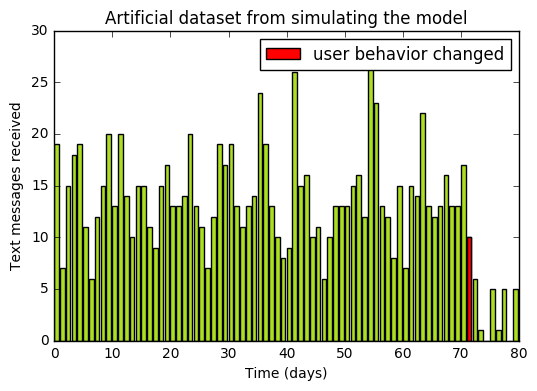

In [39]:
plt.bar(np.arange(80), data, color="#ACDE23")
plt.bar(tau - 1, data[tau - 1], color="r", label ="user behavior changed")
plt.xlabel("Time (days)")
plt.ylabel("Text messages received")
plt.title("Artificial dataset from simulating the model")
plt.xlim(0, 80)
plt.legend()

In [41]:
def plt_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]
    plt.bar(np.arange(80), data, color="#45342A")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behavior changed")
    plt.xlim(0, 80)

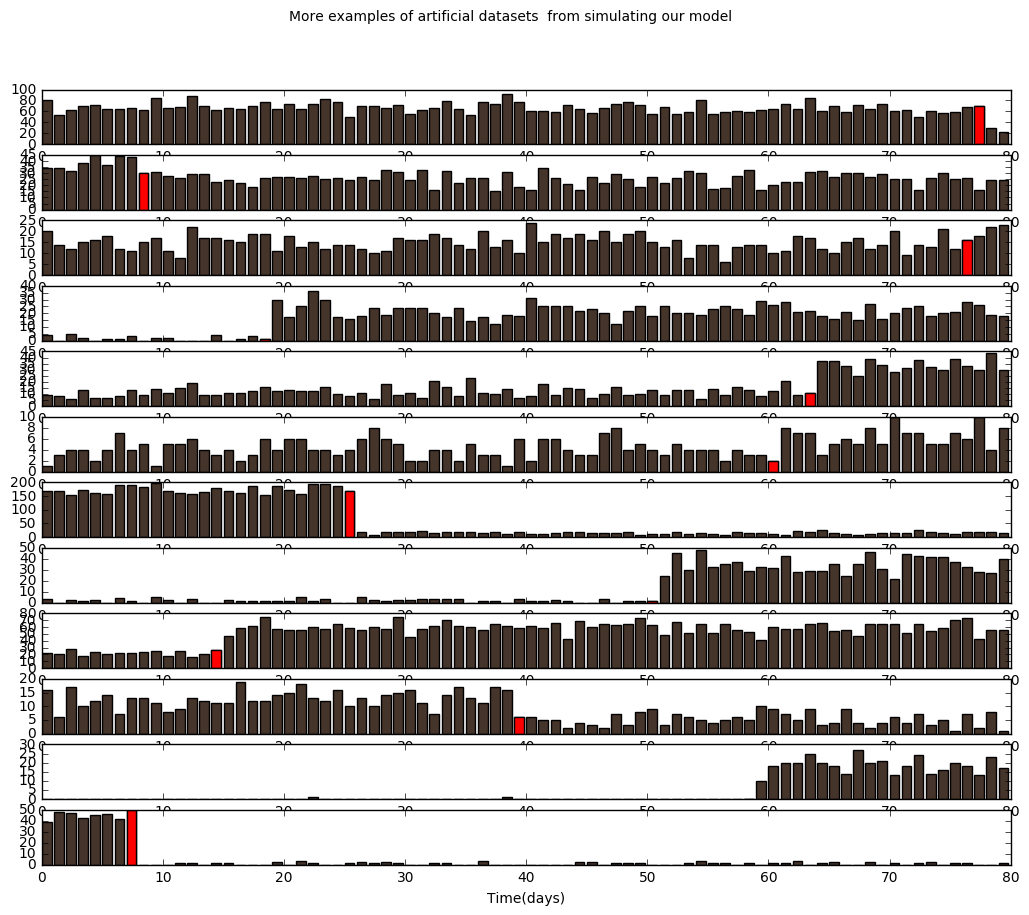

In [45]:
figsize(12.5, 10)
plt.suptitle("More examples of artificial datasets  from simulating our model")
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.xlabel("Time(days)")
    plt_artificial_sms_dataset()

In [71]:
p = pm.Uniform('p', lower=0, upper=1)
p_true = 0.05
N = 15000
occurrences = pm.rbernoulli(p_true, N)

In [72]:
print(occurrences)

[False False False ..., False False False]


In [73]:
print(occurrences.sum())

743


In [74]:
print("What is the observed frequency in Group A? %.4f" % occurrences.mean())

What is the observed frequency in Group A? 0.0495


In [75]:
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

In [76]:
mcmc=pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 2.9 sec

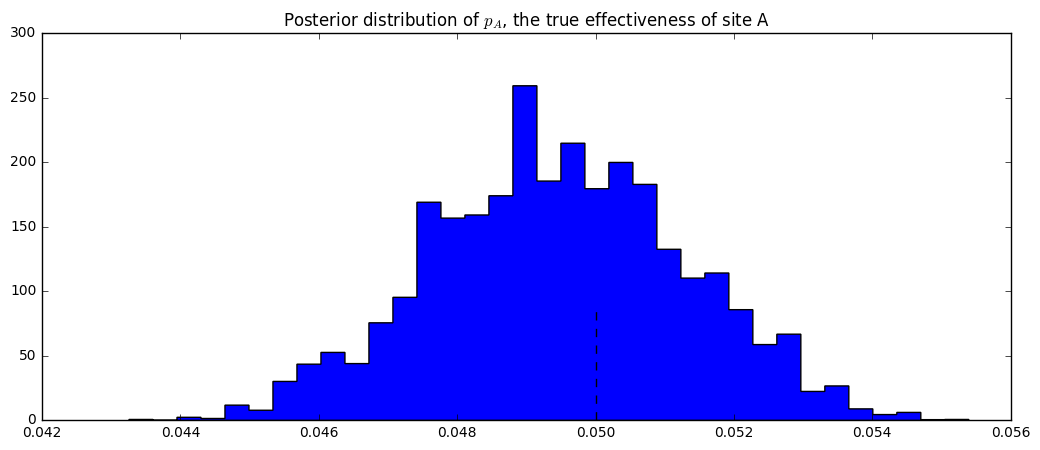

In [77]:
figsize(12.5, 5)
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:], bins=35, histtype="stepfilled", normed=True)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")

In [92]:
figsize(12, 4)
true_p_A=0.05
true_p_B=0.04
N_A=1500
N_B=750

observations_A=pm.rbernoulli(true_p_A, N_A)
observations_B=pm.rbernoulli(true_p_B, N_B)

print("Obs from Site A:", observations_A[:30].astype(int), "...")
print("Obs fro mSite B:", observations_B[:30].astype(int), "...")

Obs from Site A: [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs fro mSite B: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] ...


In [93]:
print(observations_A.mean())
print(observations_B.mean())

0.0573333333333
0.0426666666667


In [94]:
p_A = pm.Uniform("p_A", 0,1)
p_B = pm.Uniform("p_B", 0,1)

@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(25000, 5000)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.9 sec

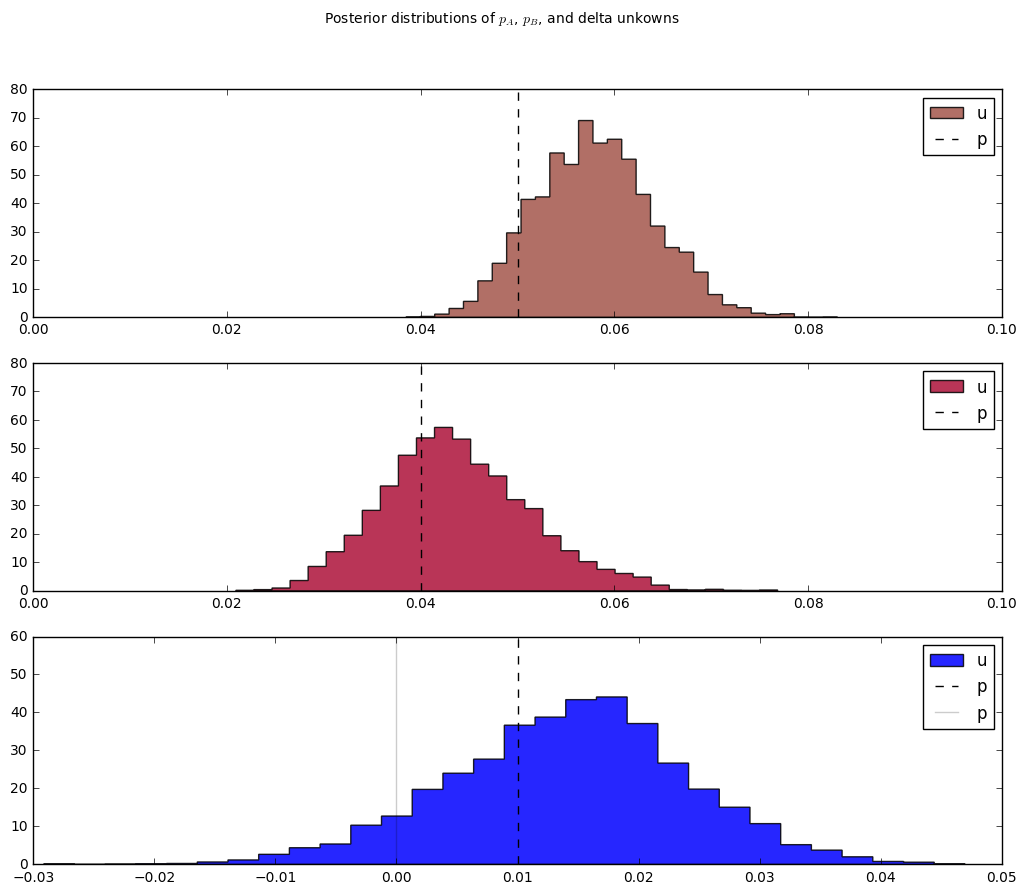

In [116]:
p_A_samples   = mcmc.trace("p_A")[:]
p_B_samples   = mcmc.trace("p_B")[:]
delta_samples  = mcmc.trace("delta")[:]
figsize(12.5, 10)

ax = plt.subplot(311)
plt.hist(p_A_samples, label="posterior of $p_A$",  histtype="stepfilled", bins=30, alpha=0.85, color="#A4564B", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$")
plt.xlim(0, .1)
plt.ylim(0, 80)
plt.legend("upper right")
plt.suptitle("Posterior distributions of $p_A$, $p_B$, and delta unkowns")

ax = plt.subplot(312)
plt.hist(p_B_samples, histtype="stepfilled", bins=30, alpha=0.85, label="posterior of $p_B$", color="#ad123a", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$")
plt.legend("upper right")
plt.xlim(0, .1)
plt.ylim(0, 80)

a = plt.subplot(313)
plt.hist(delta_samples, histtype="stepfilled", bins=30, alpha=0.85, label="posterior of delta", normed=True)
plt.vlines(true_p_A-true_p_B, 0, 60,linestyle="--", label="true delta(unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)

plt.legend("upper right")

(0, 0.1)

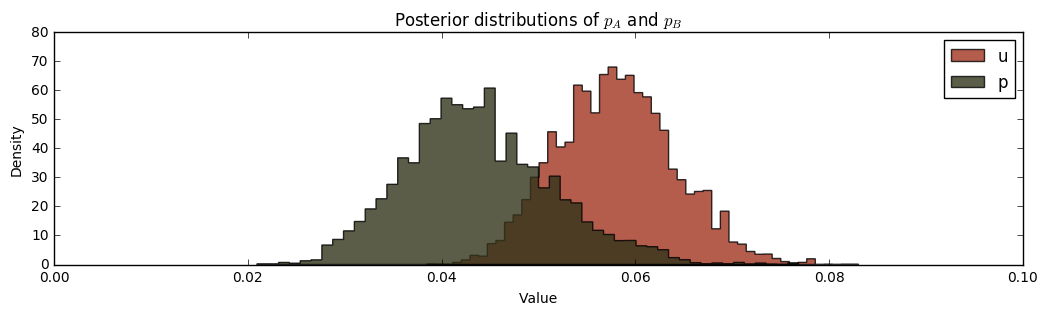

In [124]:
figsize(12.5, 3)
plt.hist(p_A_samples, histtype="stepfilled", bins=50, alpha=0.80, label="posterior of $p_A$", color="#A23421", normed=True)
plt.hist(p_B_samples, histtype="stepfilled", bins=50, alpha=0.80, label="posterior of $p_B$", color="#32341A", normed=True)
plt.legend("upper right")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior distributions of $p_A$ and $p_B$")
plt.ylim(0, 80)
plt.xlim(0, .1)